### Library loading

In [137]:
import os

# for handling dataframe
import re
import csv
import pandas as pd
import numpy as np

# for BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# for wordcloud
import matplotlib.pylab as plt
from wordcloud import WordCloud
from PIL import Image

work_dir = 'D:/Document/project/HYStudy/scripts'
os.chdir(work_dir)

### Data loading

In [15]:
raw_text = pd.read_csv('[HYStudy 17th] ex_data.csv', encoding='utf-8', names=['content'])
raw_text.head()

,content
0,대리점 폰 사려 꼭알아가야할점 그런것들있나 제 지금 gpro2 쓰 넘 약정 끝나 그...
1,위약4 질문 g5 제 ㅎㅇ 개통 599유 조건 그 유지 끝내 나 폰 바꾸 되 저 청...
2,가격대 중고가20만원 포함 추천 이어폰 어느정도 후보군 추려 er4 ue900 트파...
3,잠깐 기기 위약금 나오 제 g5 새기 생기 통신사 skt 유심 하려 보 g5새 lg...
4,g5 진열 되 상태 폰 못쓸거같은데 예 도색 벗기 요


### Make Corpus

In [19]:
corpus = np.array(raw_text['content'])
print(len(corpus))
print(corpus[0:3])

raw_text.tail()

8349
[ '대리점 폰 사려 꼭알아가야할점 그런것들있나 제 지금 gpro2 쓰 넘 약정 끝나 그 폰 발열 하구 베터리 따르 엇보 와이파이 접촉 불량때문 와이파이 켜 않 이참 폰 바꾸 하 노트5 g5 생각 g5 평이 너무 안좋더 노트5생 요즘 노트5 대리점 구입 얼마인가 kt쓰고있 기기 하 생각 폰 법 바뀌 나 구매 알아야할점 그런것들있나 네이버 치 노트5 정도 하 것 맞 요즘 69했을경우 음 제 대충 보기 요금 따르 공시 바뀌 요금 비싼요금제 시작 한달 쓰 바 바꾸 되 이런것들 추가적 있 대리점 요금 구매 혜택 있 블루스 그런곳 바꾸 정보 주세 사 당하 하 흑'
 '위약4 질문 g5 제 ㅎㅇ 개통 599유 조건 그 유지 끝내 나 폰 바꾸 되 저 청구 위약4 3 ㅎㅇ완납 4 금액 550 사용 제외 730 이 되 ㅎㅇ 개통 g5 사용 다시 번이했 경우 위 금액만큼 제 물 맞 문의 드립 다'
 '가격대 중고가20만원 포함 추천 이어폰 어느정도 후보군 추려 er4 ue900 트파 포낙 보스 h3 등 있 무선 제이버드 akg 브라 rox sbh80 정도 있나봐 추천 대브븐 유선 해주 무선 음악 리면 되는거 apt x 지원 sbh80 유닛 소리 어느정도 간음 안되 비교 분 계신 그리 g5 이번 나 리시버 o 연결 위 후보군 성능 다 올라가능건가 니 b o 성향 맞추 유닛 가리 쓰 분 계신 요']


,content
8344,카우붐 마지막 수령 레노 g50 amd 램6기 모델 비닐 다 안떼졌 베젤 극 기스 ...
8345,라온티앤아 타무즈 스톤 x 사용 싼 게이밍 마우스 다를봐 없 게이밍 라온티앤아 타무...
8346,만약 ㅎㅇ 핸드폰 구입 핸드폰 새 사 되 크 ㅂㅇ ㅎㅇ v10 을 구입 초 g5 나...
8347,cube t8 plus noroot 내장메모리 통합 순정 리커버리 sd 해제 cub...
8348,노트북 살 하 사야 하 모르 업무용 가지 녀 집 사용 게임 던파 가끔 하 현재 사용...


### Make BOW

In [25]:
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus = tf_vectorizer.fit(corpus)
tf_bow = tf_vectorizer.fit_transform(corpus)
tf_bow

<8349x3578 sparse matrix of type '<class 'numpy.int64'>'
	with 193856 stored elements in Compressed Sparse Row format>

In [29]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tfidf_corpus = tf_vectorizer.fit(corpus)
tfidf_bow = tfidf_vectorizer.fit_transform(corpus)
tfidf_bow

<8349x3578 sparse matrix of type '<class 'numpy.float64'>'
	with 193856 stored elements in Compressed Sparse Row format>

- TF vectorizer

In [45]:
# check vocabulary in TDM
print(len(tf_corpus.vocabulary_))
print(len(tf_vectorizer.get_feature_names()))
tf_vectorizer.get_feature_names()[1000:1010]

3578
3578


['대폭', '대하', '대학생', '대한민국', '대해', '대형', '대화면', '댓글', '더럽', '더불']

In [42]:
# frequency count
tf_word_sum = tf_bow.toarray().sum(axis=0)
tf_word_name = tf_vectorizer.get_feature_names()
tf_word_dict = {}

for i in range(len(tf_word_sum)):
    tf_word_dict[tf_word_name[i]] = tf_word_sum[i]
    
print(tf_vectorizer.get_feature_names()[150:160])
print(tf_word_sum[150:160])

['g5쪽', 'g5출시', 'g5카메', 'g5하', 'g5후', 'g6', 'g7', 'g7x', 'galaxy', 'gk']
[ 9 16 11  9  9 66 11 15 54 18]


In [49]:
# word & index number
tf_word_dict

{'ㄷㄷㄷㄷ': 24,
 '사기': 75,
 '가격': 981,
 '오지': 16,
 '자동차': 48,
 '약해': 18,
 '비슷': 295,
 '침수': 25,
 '신고': 10,
 '4월1': 10,
 'a4': 10,
 '판매가': 18,
 '이제': 468,
 '지투': 28,
 '기대감': 15,
 '정보공유': 10,
 '걸치': 9,
 '오라': 14,
 '생긴': 42,
 '말리': 15,
 '판정': 21,
 '달고': 42,
 '장난': 38,
 '편의': 13,
 '구멍': 20,
 '검은색': 21,
 '불쌍': 10,
 '둘이': 11,
 '지지': 13,
 '요거': 9,
 '마음': 329,
 '네트워크': 10,
 '보네': 39,
 '안나': 133,
 '아이폰5s': 20,
 '서브': 39,
 '호환성': 23,
 '어딘가': 11,
 '축소': 13,
 '학생': 14,
 '어서': 21,
 '답답': 84,
 '얼굴': 23,
 '투표': 23,
 '테크홀릭': 18,
 '직원': 115,
 '차액': 17,
 '끝나': 164,
 '도중': 15,
 '타입': 46,
 '엊그제': 18,
 '느리': 88,
 'google': 26,
 '제생': 18,
 '수요가': 12,
 '투명': 58,
 '통하': 114,
 '기기': 780,
 '통합': 27,
 '대폭': 14,
 'ㅌㅋㄴㅁㅌ': 9,
 '정도': 930,
 '눈길': 11,
 '블루투스': 144,
 '번갈': 16,
 '연락': 100,
 '색이': 23,
 '단통법때문': 10,
 '자기': 119,
 '아프': 28,
 '서비스센터': 181,
 '입체감': 10,
 '패키지': 34,
 '플래그': 10,
 'g50': 39,
 '마이크': 43,
 '자동': 162,
 'cat6': 21,
 '앱서랍': 27,
 '다음주': 47,
 '나뉘': 10,
 '가도': 25,
 '정책': 146,
 'h3이어폰': 17,
 '장점': 203,
 '웹서

- TF-IDF vectorizer

In [44]:
# check vocabulary in TDM
print(len(tfidf_corpus.vocabulary_))
print(len(tfidf_vectorizer.get_feature_names()))
tfidf_vectorizer.get_feature_names()[1000:1010]

3578
3578


['대폭', '대하', '대학생', '대한민국', '대해', '대형', '대화면', '댓글', '더럽', '더불']

In [43]:
# frequency count
tfidf_word_sum = tfidf_bow.toarray().sum(axis=0)
tfidf_word_name = tfidf_vectorizer.get_feature_names()
tfidf_word_dict = {}

for i in range(len(tfidf_word_sum)):
    tfidf_word_dict[tfidf_word_name[i]] = tfidf_word_sum[i]
    
print(tfidf_vectorizer.get_feature_names()[150:160])
print(tfidf_word_sum[150:160])

['g5쪽', 'g5출시', 'g5카메', 'g5하', 'g5후', 'g6', 'g7', 'g7x', 'galaxy', 'gk']
[  1.9353321    4.90042073   3.53566612   2.89852336   2.48341187
  11.61954354   2.57126653   2.2969142    7.82942507   2.74237528]


In [50]:
# word & index number
tfidf_word_dict

{'ㄷㄷㄷㄷ': 6.672308023998859,
 '사기': 12.311579076509688,
 '가격': 110.24223903450296,
 '오지': 3.5258450493985207,
 '자동차': 4.7080722764468463,
 '약해': 3.2008643047701453,
 '비슷': 37.455093506113101,
 '침수': 5.4908096120166121,
 '신고': 1.3354455889028733,
 '4월1': 3.4451928922968205,
 'a4': 1.8961802634503444,
 '판매가': 2.5333929412625262,
 '이제': 55.547072694354739,
 '지투': 5.7602462724092272,
 '기대감': 2.8320344860635811,
 '정보공유': 2.5365324309919992,
 '걸치': 0.71404938435427023,
 '오라': 2.8014070851034187,
 '생긴': 5.5161055480797652,
 '말리': 2.3737709875787076,
 '판정': 4.4303538168013059,
 '달고': 6.056523216438773,
 '장난': 6.6912881860781743,
 '편의': 1.5767346789852208,
 '구멍': 2.2587532719718766,
 '검은색': 2.4589415530683039,
 '불쌍': 1.8952897522732701,
 '둘이': 2.1426542303308325,
 '지지': 2.2356514594423675,
 '요거': 1.9235727930708011,
 '마음': 33.960106765056501,
 '네트워크': 1.6482458682085441,
 '보네': 9.6405567526956855,
 '안나': 19.920294708395609,
 '아이폰5s': 3.176288446252252,
 '서브': 5.8912957008676452,
 '호환성': 3.731974

### File write by csv

In [65]:
with open('tf.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f, delimiter=',', lineterminator='\n')
    for key, value in tf_word_dict.items():
        w.writerow([key, value])

with open('tfidf.csv', 'w') as f:
    w = csv.writer(f, delimiter=',', lineterminator='\n')
    for key, value in tfidf_word_dict.items():
        w.writerow([key, value]) 

### Co-occurence Matrix

In [67]:
tf_cooccur = (tf_bow.T * tf_bow) # co-occurrence matrix in sparse csr format
tf_cooccur.setdiag(0) # fill same word cooccurence to 0
print(tf_cooccur.todense()) # print out matrix in dense format
tf_cooccur

[[0 3 0 ..., 0 0 0]
 [3 0 0 ..., 2 1 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 2 0 ..., 0 0 1]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]


<3578x3578 sparse matrix of type '<class 'numpy.int64'>'
	with 3661940 stored elements in Compressed Sparse Column format>

In [71]:
# create co-occurence matrix to pandas dataframe
tf_df = pd.DataFrame(data=tf_cooccur.todense(),
             index=tf_corpus.vocabulary_.keys(),
             columns=tf_corpus.vocabulary_.keys())
tf_df[0:10]

,오지,후속,걸치,마음,책정,캐논,아끼,싸우,국민,이쯤,...,카드사,박스,걸리,꾸준,사용,혹시나해,오줌,소프트,전환,대충
오지,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
후속,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0
걸치,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
마음,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
책정,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
캐논,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
아끼,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
싸우,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
국민,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
이쯤,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# co-occurence matrix to csv
tf_df.to_csv('tf_cooccur.csv', index=True, sep=';')

### WordCloud
- pip install wordcloud
- conda install -c https://conda.anaconda.org/amueller wordcloud


- GitHub Add.: https://github.com/amueller/word_cloud
- Doc: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
- Mask image source: http://www.stencilry.org/stencils/

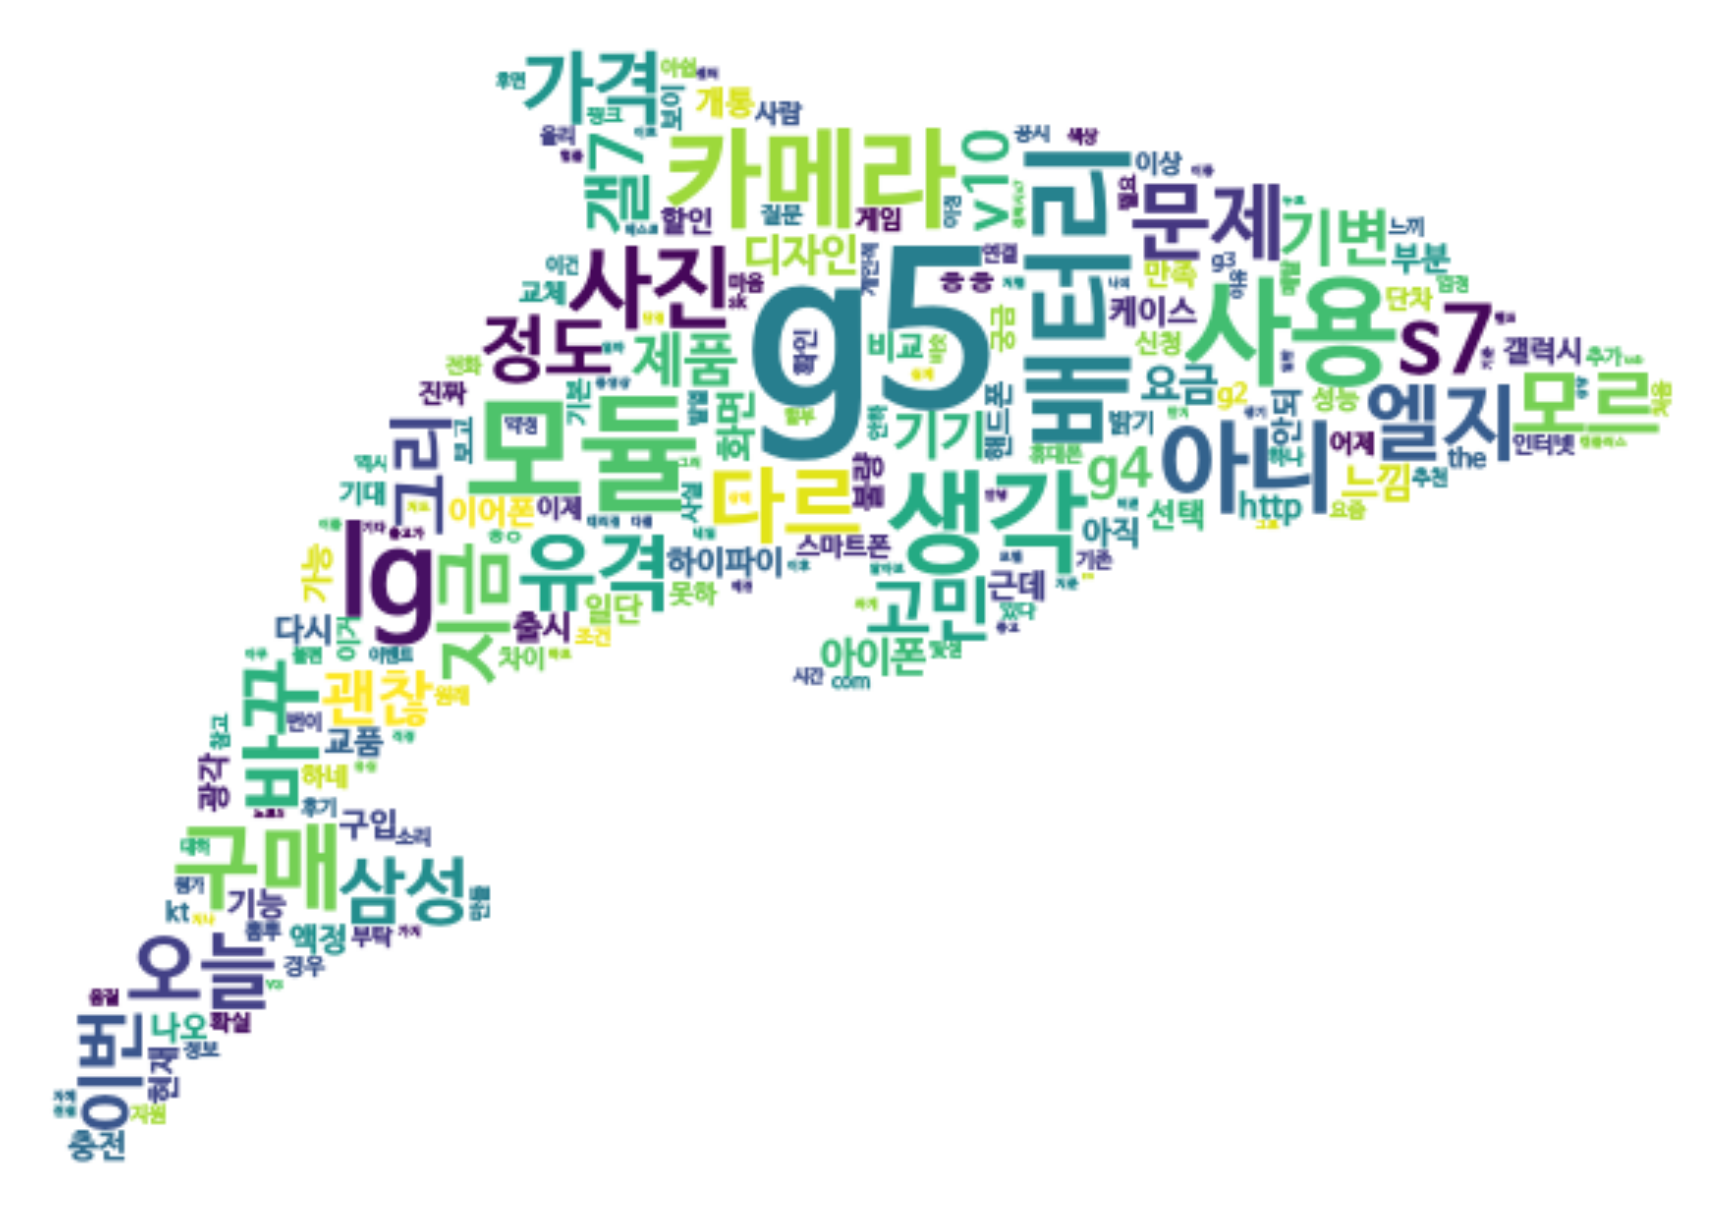

In [159]:
# use Korean font, set mask image
font_path = 'C:/Windows/Fonts/NanumBarunGothicBold.otf'
mask_image = np.array(Image.open('D:/Document/project/HYStudy/scripts/[HYStudy 17th] mask_image.jpg'))

# Generate a word cloud image and display
wordcloud = WordCloud(max_font_size=72,
                      font_path=font_path,
                      background_color='white',
                      mask=mask_image).generate_from_frequencies(tf_word_dict)

plt.figure(figsize=(30, 90))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()